In [11]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [13]:
x_train = x_train / 255.0
x_test = x_test / 255.0


Преобразование категориальных меток в one-hot encoding

In [14]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

Добавление измерения для канала (т.к. у нас один канал изображения)

In [15]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [16]:
input_shape = (28, 28, 1)

Определение архитектуры модели

In [17]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    Conv2D(32, padding='same', kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, padding='same', kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

Компиляция модели

In [18]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


Аугментация данных

In [19]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

Обучение модели
Добавили раннюю остановку (Early Stopping)

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(datagen.flow(x_train.reshape((-1, 28, 28, 1)), y_train_cat, batch_size=32),
                    epochs=15,
                    validation_data=(x_test.reshape((-1, 28, 28, 1)), y_test_cat),
                    callbacks=[early_stopping])

Epoch 1/15
1875/1875 [==============================] - 80s 42ms/step - loss: 0.6925 - accuracy: 0.7491 - val_loss: 0.4361 - val_accuracy: 0.8398
Epoch 2/15
1875/1875 [==============================] - 80s 43ms/step - loss: 0.4928 - accuracy: 0.8203 - val_loss: 0.4533 - val_accuracy: 0.8343
Epoch 3/15
1875/1875 [==============================] - 86s 46ms/step - loss: 0.4359 - accuracy: 0.8436 - val_loss: 0.3614 - val_accuracy: 0.8665
Epoch 4/15
1875/1875 [==============================] - 78s 42ms/step - loss: 0.3988 - accuracy: 0.8554 - val_loss: 0.3438 - val_accuracy: 0.8707
Epoch 5/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.3772 - accuracy: 0.8638 - val_loss: 0.4234 - val_accuracy: 0.8546
Epoch 6/15
1875/1875 [==============================] - 88s 47ms/step - loss: 0.3664 - accuracy: 0.8679 - val_loss: 0.3115 - val_accuracy: 0.8859
Epoch 7/15
1875/1875 [==============================] - 78s 41ms/step - loss: 0.3524 - accuracy: 0.8736 - val_loss: 0.3953 -

Построение графиков точности и потерь

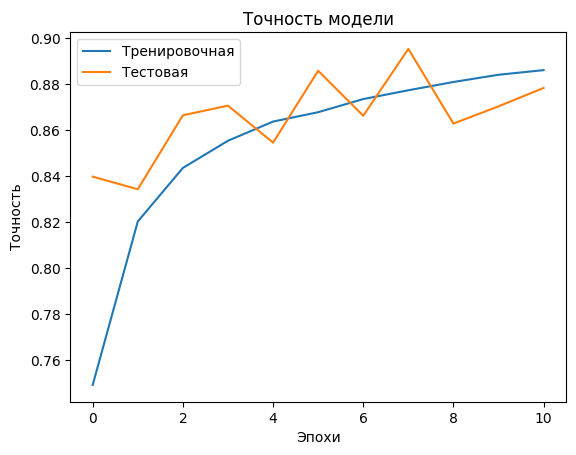

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Эпохи')
plt.legend(['Тренировочная', 'Тестовая'], loc='upper left')
plt.show()

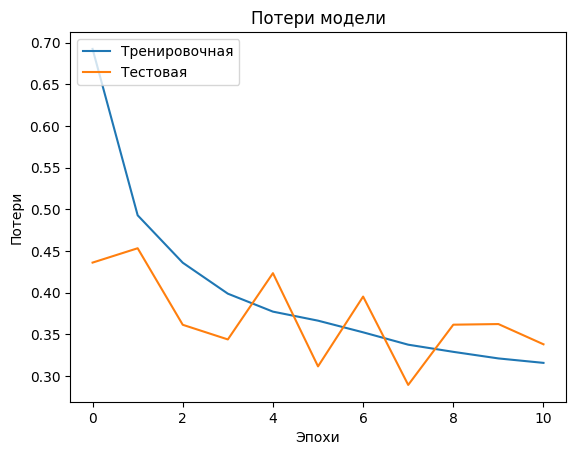

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('Эпохи')
plt.legend(['Тренировочная', 'Тестовая'], loc='upper left')
plt.show()

Вывод информации о модели

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                      

Что мы сделали:
1. Увеличили количество эпох до 15.
2. Добавили Early Stopping.
3. Добавили аугментацию данных.


Вывод: 
Увеличение количества эпох до 15 привело к некоторому улучшению точности на тренировочном наборе данных, но в то же время точность на валидационном наборе данных начала падать после 8-й эпохи, что свидетельствует о начале переобучения модели.